In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv("train_qnU1GcL.csv")
df_test = pd.read_csv("test_LxCaReE_DvdCKVT2_7rMflxW_O46whsi_lVTFXAY_GjPXzPU_eKeNhue - Copy - Copy - Copy.csv")

In [3]:
df_train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [4]:
df_test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [5]:
df_train.shape , df_test.shape

((79853, 12), (34224, 11))

In [6]:
df_train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [7]:
df_test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

In [8]:
df_train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [9]:
df_train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [10]:
df_test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

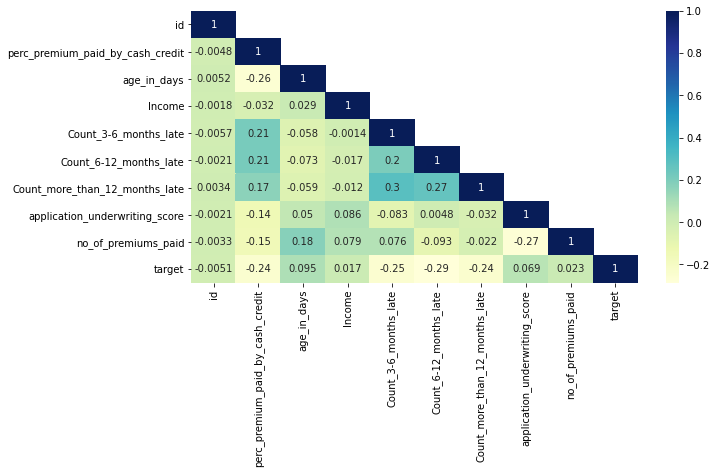

In [11]:
cor = df_train.corr()
mask_data = np.array(cor)
mask_data[np.tril_indices_from(mask_data)] = False
fig , ax = plt.subplots(1,figsize = (10,5))
sns.heatmap(cor,annot=True,mask=mask_data,ax=ax,cmap='YlGnBu')

In [12]:
df_train.drop(['application_underwriting_score'],axis=1,inplace=True)
df_test.drop(['application_underwriting_score'],axis=1,inplace=True)


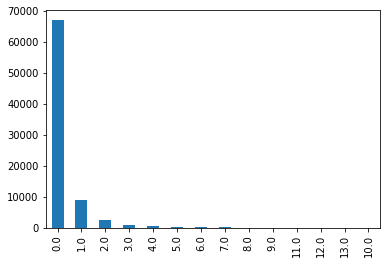

In [13]:
df_train['Count_3-6_months_late'].value_counts().plot.bar()

In [14]:
for column in ['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late']:
  df_train[column].fillna(df_train[column].mode()[0], inplace=True)
  df_test[column].fillna(df_test[column].mode()[0], inplace=True)


In [15]:
df_train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [16]:
submission_1 = pd.DataFrame()

In [17]:
submission_1['id'] = df_test['id']

In [18]:
df_train.drop(['id','residence_area_type'],axis=1,inplace=True)
df_test.drop(['id','residence_area_type'],axis=1,inplace=True)

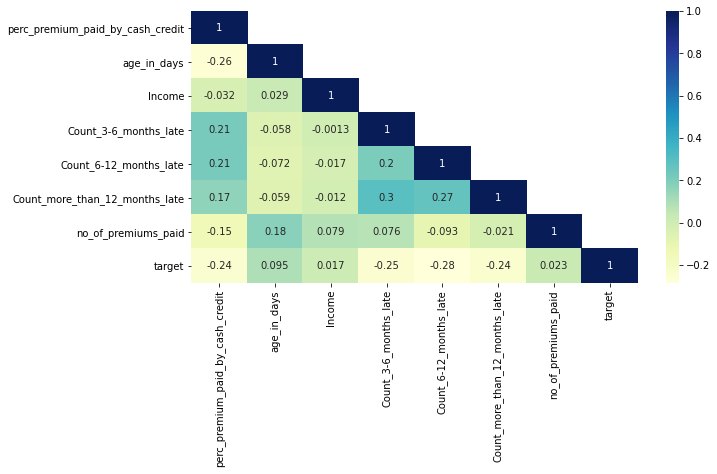

In [19]:
cor = df_train.corr()
mask_data = np.array(cor)
mask_data[np.tril_indices_from(mask_data)] = False
fig , ax = plt.subplots(1,figsize = (10,5))
sns.heatmap(cor,annot=True,mask=mask_data,ax=ax,cmap='YlGnBu')

In [20]:
df_test.shape,df_train.shape

((34224, 8), (79853, 9))

In [21]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_train['sourcing_channel']= label_encoder.fit_transform(df_train['sourcing_channel'])
# df_train['residence_area_type']= label_encoder.fit_transform(df_train['residence_area_type'])

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df_test['sourcing_channel']= label_encoder.fit_transform(df_test['sourcing_channel'])
# df_test['residence_area_type']= label_encoder.fit_transform(df_test['residence_area_type'])

In [23]:
trainning_x = df_train.iloc[:,:-1] 
trainning_y = df_train.iloc[:,-1]
x_test = df_test.iloc[:,:]

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_val , y_train , y_val = train_test_split(trainning_x , trainning_y ,test_size = 0.2 , random_state = 0)

In [25]:
x_train.shape , x_val.shape , y_train.shape , y_val.shape , x_test.shape

((63882, 8), (15971, 8), (63882,), (15971,), (34224, 8))

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( criterion='entropy')

In [27]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0, max_iter=100, verbose=0, n_jobs=-1)

In [28]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
pred_train = clf.predict(x_train)
pred_val = clf.predict(x_val)
pred_test = clf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
cm = confusion_matrix(y_train,pred_train)
print(cm)
print(accuracy_score(y_train,pred_train))
print(roc_auc_score(y_train,pred_train))

[[ 4021     0]
 [    0 59861]]
1.0
1.0


In [31]:
cm = confusion_matrix(y_val,pred_val)
print(cm)
print(accuracy_score(y_val,pred_val))
#print(roc_auc_score(y_val,pred_val))

[[  228   749]
 [  898 14096]]
0.8968755870014401


In [32]:
submission_1['target'] = pred_test

In [33]:
# submission_1.to_csv('submission_1.csv', header=True, index=False)